# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [1]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [2]:
iris = datasets.load_iris()
print(iris.keys())
print(iris.DESCR)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [3]:
print(iris['feature_names'])


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [22]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns= iris['feature_names'])
 
x_2 = x[['sepal length (cm)', 'sepal width (cm)']]
print(x_2)
x_3 = x.iloc[:,:2]
print(x_3)
# we only take the first two features. 

     sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns]
     sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9           

In [23]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [24]:
print("target_name:" +str(iris['target_names']))

target_name:['setosa' 'versicolor' 'virginica']


In [25]:
#建立Target欄位與資料
y = pd.DataFrame(iris["target"], columns = ['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [26]:
#合併資料特徵欄位與目標欄位
data = pd.concat([x,y], axis = 1)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
#只選擇目標為0與1的資料
data2 = data[(data['target'] == 0) | (data['target'] == 1)]
print(data2)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
..                ...               ...                ...               ...   
95                5.7               3.0                4.2               1.2   
96                5.7               2.9                4.2               1.3   
97                6.2               2.9                4.3               1.3   
98                5.1               2.5                3.0               1.1   
99                5.7               2.8                4.1               1.3   

    target  
0        0  
1        0  


## 切分訓練集與測試集
> train_test_split()

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    data2[['sepal length (cm)', 'sepal width (cm)']], data2[["target"]], test_size = 0.3)

In [29]:
x_train.head()

,sepal length (cm),sepal width (cm)
4,5.0,3.6
6,4.6,3.4
28,5.2,3.4
25,5.0,3.0
1,4.9,3.0


In [30]:
x_test.head()

,sepal length (cm),sepal width (cm)
42,4.4,3.2
61,5.9,3.0
64,5.6,2.9
89,5.5,2.5
69,5.6,2.5


# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [43]:
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return [minimum, maximum, mu, sigma] #This is a tuple.


def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [46]:
stats = norm_stats(x_train)

x_train_z = z_score(x_train, stats)
print(x_train_z)
arr_x_train = np.array(z_score(x_train, stats))
arr_y_train = np.array(y_train)


    sepal length (cm)  sepal width (cm)
4           -0.611185          1.100099
6           -1.215892          0.647117
28          -0.308832          0.647117
25          -0.611185         -0.258847
1           -0.762362         -0.258847
..                ...               ...
77           1.958817         -0.258847
67           0.598227         -0.938320
95           0.447051         -0.258847
58           1.807640         -0.485338
3           -1.215892         -0.032356

[70 rows x 2 columns]


C:\Users\user\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\user\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\user\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [57]:
stats_train, stats_test = norm_stats(x_train), norm_stats(x_test)

arr_x_train, arr_x_test  = np.array(z_score(x_train, stats_train)), np.array(z_score(x_test, stats_test))
arr_y_train, arr_y_test= np.array(y_train), np.array(y_test)

C:\Users\user\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\user\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\user\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\numpy\core\f

,0,1
0,-0.611185,1.100099
1,-1.215892,0.647117
2,-0.308832,0.647117
3,-0.611185,-0.258847
4,-0.762362,-0.258847
...,...,...
65,1.958817,-0.258847
66,0.598227,-0.938320
67,0.447051,-0.258847
68,1.807640,-0.485338


## use sklearn

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.40428571 3.11428571]
[0.66147794 0.44151871]


In [62]:
#transform: (x-u)/std.
x_train_std = sc.transform(x_train)
x_train_std[:5]

array([[-0.61118549,  1.10009898],
       [-1.21589197,  0.64711704],
       [-0.30883224,  0.64711704],
       [-0.61118549, -0.25884682],
       [-0.76236211, -0.25884682]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [63]:
x_test_std = sc.transform(x_test)
print(x_test_std[:10])

[[-1.51824522  0.19413511]
 [ 0.74940411 -0.25884682]
 [ 0.29587425 -0.48533778]
 [ 0.14469762 -1.39130165]
 [ 0.29587425 -1.39130165]
 [ 0.44705087 -0.48533778]
 [-0.006479    1.77957187]
 [-0.76236211  1.10009898]
 [-0.006479   -0.25884682]
 [-0.46000886  1.32658994]]


you can also use fit_transform method (i.e., fit and then transform)    

In [67]:
#直接fit and transform
x_train_std = sc.fit_transform(x_train)  
x_test_std = sc.fit_transform(x_test)
print(x_test_std[:10])


[[-2.22740051  0.24966142]
 [ 0.49632294 -0.11569676]
 [-0.04842175 -0.29837584]
 [-0.23000331 -1.02909219]
 [-0.04842175 -1.02909219]
 [ 0.13315981 -0.29837584]
 [-0.41158488  1.52841503]
 [-1.31949269  0.98037777]
 [-0.41158488 -0.11569676]
 [-0.95632956  1.16305686]]


In [68]:
print('mean of X_train_std:',np.round(x_train_std.mean(),4))
print('std of X_train_std:',x_train_std.std())

mean of X_train_std: -0.0
std of X_train_std: 1.0000000000000002


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


51.300073184047086
30.339514993244364


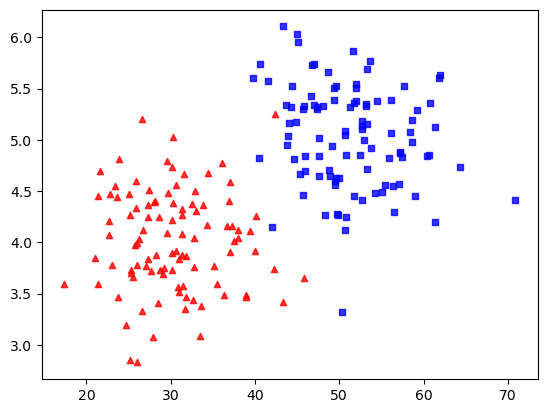

In [69]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [70]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [71]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [72]:
minmax_norm(x_val[:10])

array([0.21820117, 0.31740102, 0.8895459 , 0.18435534, 0.76928544,
       0.42465378, 0.68301843, 0.        , 1.        , 0.59233125])

In [74]:
from sklearn.preprocessing import MinMaxScaler

x_val=x_val.reshape(-1, 1) # 1D to 2D
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.data_min_)
print(scaler.transform(x_val)[:10])

[70.89279339]
[17.38332731]
[[0.52939701]
 [0.56429351]
 [0.76556248]
 [0.51749073]
 [0.72325729]
 [0.60202285]
 [0.6929103 ]
 [0.45263826]
 [0.80441799]
 [0.66100839]]
